***
# 03-Value-Iteration
***

## Definition by ChatGPT :
### Value Iteration is another algorithm commonly used in reinforcement learning for solving Markov Decision Processes (MDPs) and finding an optimal policy. Here's a simple definition of the Value Iteration Algorithm:

### Value Iteration is an iterative algorithm that aims to find the optimal value function for each state in a Markov Decision Process (MDP). The algorithm alternates between two main steps:

### Value Update:

Initialize the value function for each state.
Update the value of each state based on the maximum expected cumulative reward achievable from that state, considering all possible actions.
Repeat this process until the values converge.

### Policy Extraction:

Extract the optimal policy from the converged value function by selecting the action in each state that maximizes the expected cumulative reward.
Repeat these steps iteratively until the values converge to their optimal values. The key idea is to iteratively refine the estimates of the optimal values for each state based on the information gathered during the previous iterations. Once the values converge, the associated policy can be extracted, providing the optimal actions to take in each state to maximize the expected cumulative reward.

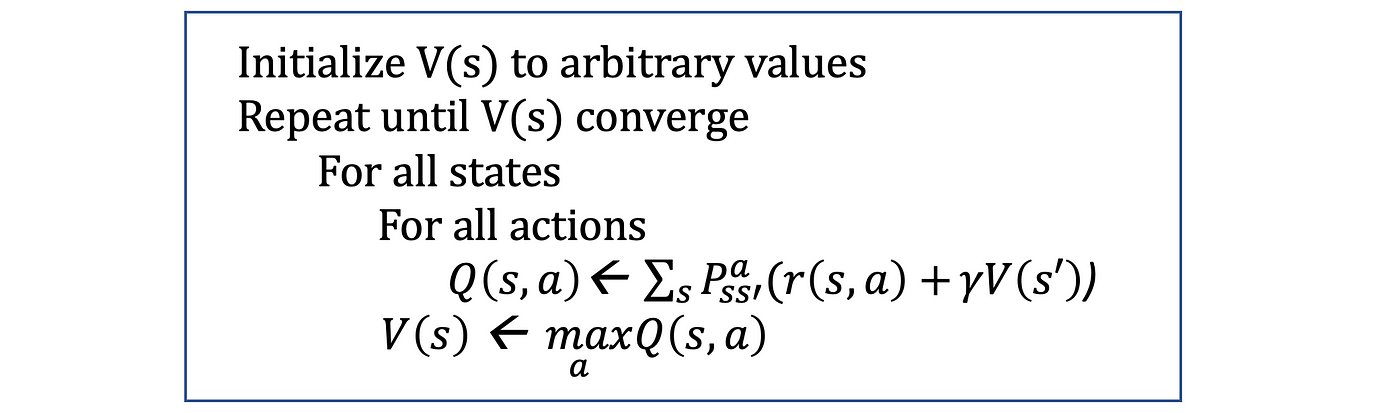

In [1]:
import gym
import time 
import pygame
import numpy as np
from IPython import display
import matplotlib.pyplot as plt

In [2]:
env = gym.make('FrozenLake-v1', desc=None, map_name='4x4', is_slippery=False)

## Value Iteration

In [3]:
num_states = env.observation_space.n
num_actions = env.action_space.n

gamma = 0.99
theta = 1e-9

def value_iteration():
    prev_V = np.zeros((num_states, 1))
    policy = np.zeros((num_states, num_actions))
    iteration_v = 0

    
    while True:
        iteration_v += 1
        Q = np.zeros((num_states, num_actions))
        
        for state in range(num_states):
            for action in range(num_actions):
                for prob, next_state, reward, _ in env.P[state][action]:
                    Q[state][action] += prob * (reward + gamma * prev_V[next_state])
    
        V = np.max(Q, axis = 1)
        
        if np.max(np.abs(prev_V - V)) < theta:
            break
        
        prev_V = V
        
    max_index = np.argmax(Q, axis = 1)
        
    for i, optimal_action in enumerate(max_index):
        policy[i][optimal_action] = 1
    
    return policy, iteration_v

In [4]:
import warnings; warnings.simplefilter('ignore')
optimal_policy, iteration_v = value_iteration()

In [5]:
print(f'Optimal Policy:\n{optimal_policy}\n\nIteration:{iteration_v}')

Optimal Policy:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

Iteration:7


## Plot Optimal Policy

In [6]:
final_policy = np.zeros((num_states))

for state in range(num_states):
    for action in range(num_actions):
        final_policy = np.argmax(optimal_policy, axis=1)

In [7]:
final_policy

array([1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0], dtype=int64)

In [8]:
import warnings; warnings.simplefilter('ignore')
import seaborn as sns

def visualize_policy(policy, directions, terminal_states):
    
    policy = policy.reshape(4,4)
    policy_symbols = np.vectorize(directions.get)(policy)

    sns.set(style="white")
    plt.figure(figsize=(6, 4))

    mask = np.zeros_like(policy, dtype=bool)
    for state in terminal_states:
        mask[state] = True

    cmap = sns.color_palette("coolwarm", as_cmap=True)
    cmap.set_over("#1F1F1F") 

    sns.heatmap(np.zeros_like(policy), annot=policy_symbols, fmt='', cmap=cmap,linewidths=1,
                cbar=False, mask=mask, annot_kws={"weight": "bold"})

    plt.title("*Optimal Policy*\n\n0:Left \t 1:Down \t 2:Right \t 3:Up",
              fontsize='15', color='green')
    plt.xticks([])
    plt.yticks([])
    plt.show()

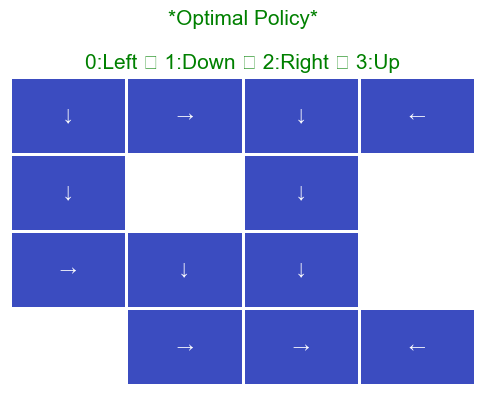

In [9]:
directions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
terminal_states = [(1, 1), (1, 3), (2, 3), (3, 0)]

visualize_policy(final_policy, directions, terminal_states)

## Use Final Policy(Optimal) in Environment

In [10]:
final_policy = np.zeros((num_states))

for state in range(num_states):
    for action in range(num_actions):
        final_policy = np.argmax(optimal_policy, axis=1)

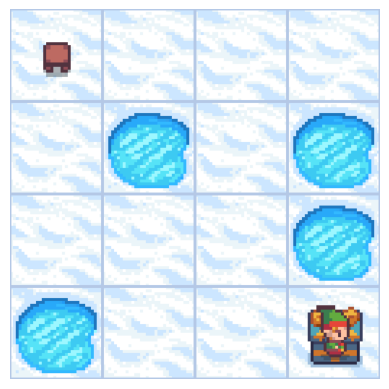

In [11]:
state = env.reset()
done = False
t = 0
while not done:
    time.sleep(0.1)
    action = final_policy[state]
    next_state, reward, done, _ = env.step(action)
    t += 1
    state = next_state

    plt.axis('off')
    plt.imshow(env.render(mode='rgb_array'))
    display.display(plt.gcf())    
    display.clear_output(wait=True)

env.close()